# Position of a Quasar

You measure the position of a quasar $N$ times with the *same* telescope i.e. errors are homoscedastic. Let's say the underlying process is Gaussian, the true position is $\mu = 1$ (in suitable units), and the erorrs are $\sigma=0.2$

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Latex

## Part 1 
### Generate fake measurements

In [6]:
N = 5
mu = 1
sigma = 0.2

np.random.seed(42)
my_sample = norm(mu, sigma).rvs(N)

In [7]:
my_sample

array([1.09934283, 0.97234714, 1.12953771, 1.30460597, 0.95316933])

### Plot each of the individual likelihood separately.  Also plot their product (i.e. the likelihood of the dataset $\{x_i\}$). Make sure the x grid has enough points.


In [8]:
# x grid
x_i = np.linspace(0, 2, 1000)

# Array of the individual likelihoods: each one is a gaussian centered in my_sample[i], the sigma is in common
Ls = np.array([norm.pdf(x_i, loc=s, scale=sigma) for s in my_sample])

# Likelihood: defined as the product between all the previous ones
L = np.prod(Ls, axis=0)

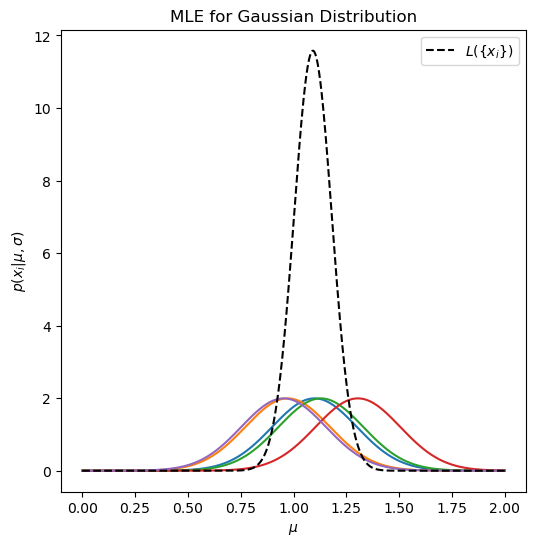

In [9]:
fig, ax = plt.subplots(figsize=(6, 6))

for likelihood in Ls:
    plt.plot(x_i, likelihood, ls='-')
    
plt.plot(x_i, L, linestyle='--', c='black', label=r'$L(\{x_i\})$')

plt.xlabel('$\mu$')
plt.ylabel(r'$p(x_i|\mu,\sigma)$')
plt.title('MLE for Gaussian Distribution')
plt.legend()

### Just read off the maximum likelihood solution (e.g. using `np.argsort`) 

In [10]:
max_index = np.argmax(L)
display(Latex(r'L is maximized for $\mu = ' + f'{np.round(x_i[max_index], 4)}$'))

<IPython.core.display.Latex object>

### Compare it with the MLE estimator derived above

In [11]:
ML_estimator = np.mean(my_sample)
print('MLE =', np.round(ML_estimator, 4))

MLE = 1.0918


### Log - likelihood

In [12]:
logL = np.log(L)

max_logL_index = np.argmax(logL)
display(Latex(r'lnL is maximized for $\mu = ' + f'{np.round(x_i[max_logL_index], 4)}$'))

<IPython.core.display.Latex object>

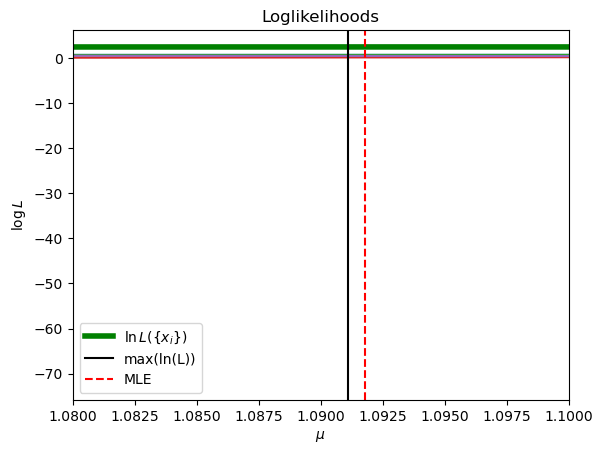

In [21]:
for i in range(N):
    plt.plot(x_i, np.log(Ls[i]))

plt.plot(x_i, np.log(L), color='green', linewidth=4, label=r'$\ln L(\{x_i\})$' )
plt.axvline(x = x_i[max_logL_index], color='black', linestyle='-', label='max(ln(L))')
plt.axvline(x=ML_estimator, color='red', linestyle='--', label='MLE')
plt.xlabel(fr'$\mu$')
plt.ylabel(fr'$\log L$')
plt.title('Loglikelihoods')
plt.xlim(1.08, 1.10)
plt.legend()

## Part 2: check the Fisher matrix error estimate makes sense

$$
    \sigma_\mu = \left[ - \frac{d^2 \ln L(\mu)}{d \mu^2}  \Bigg|_{\hat{\mu}}\right]^{-1/2}.
$$

### Do a rough $2^\mathrm{nd}$ order differentation of our log-likelihood function with `np.diff`, 

In [26]:
diff = np.diff(logL, n=2)

### Divide through by our $\Delta \theta^2$ to get the correct normalization, and multiply by $-1$

In [27]:
second_derivative = diff / (x_i[1] - x_i[0])**2
second_derivative *= -1

### Then take the square root

In [28]:
sigma_mu = 1 / np.sqrt(second_derivative[max_index])

In [29]:
print('Fisher matrix error on estimated mean is %.3f' % sigma_mu)

Fisher matrix error on estimated mean is 0.089


### Compare with the Fisher matrix error derived above

$$
    \sigma_\mu = \frac{\sigma}{\sqrt{N}}
$$

In [30]:
MLE_sigma = sigma / N**(0.5)
print('Fisher Matrix error is %.3f' % MLE_sigma)

Fisher Matrix error is 0.089


### Plot a Gaussian at the measured $\mu$ with this error as the scale to see if it matches the numerical likelihood distribution. (The normalization won't be captured, you can rescale it as you like to check it agrees) 

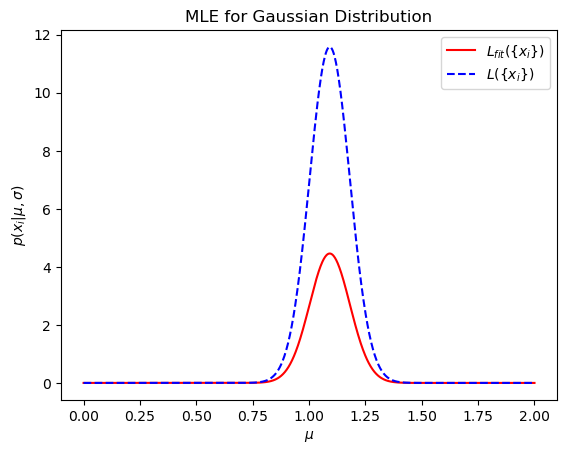

In [31]:
L_fit = norm.pdf(x_i, loc=ML_estimator, scale=MLE_sigma)
L_fit_norm = L_fit / np.max(L_fit) 

plt.plot(x_i, L_fit, color='red', label=r'$L_{fit}(\{x_i \})$')
plt.plot(x_i, L, color='blue', linestyle='--', label=r'$L(\{x_i \})$')
plt.xlabel('$\mu$') #Leave out or adjust if no latex
plt.ylabel(r'$p(x_i|\mu,\sigma)$') #Leave out or adjust if no latex
plt.title('MLE for Gaussian Distribution')
plt.legend()

## Part 3

Let's make our model more realistic. Our $N$ measurements were taken in different nights, where the sky behaved differently (i.e. errors are heteoscedastic). Let's assume that each measurment has a $\sigma_i$ that is normally distribured with mean $0.2$ and standard deviation $0.05$

### Generalize your code from above to this case

In [32]:
N = 5
mu = 1

sigma_hetero = norm(0.2, 0.05).rvs(N)

np.random.seed(42)
my_sample_hetero = norm(mu, sigma_hetero).rvs(N)

In [33]:
my_sample_hetero, sigma_hetero

(array([1.09352787, 0.9614297 , 1.15439064, 1.2688548 , 0.94681721]),
 array([0.18829315, 0.27896064, 0.23837174, 0.17652628, 0.227128  ]))

In [34]:
Ls_hetero = []
for i in range(N):
    Ls_hetero.append(norm.pdf(x_i, loc=my_sample_hetero[i], scale=sigma_hetero[i]))

Ls_hetero = np.array(Ls_hetero)
L_hetero = np.prod(Ls_hetero, axis=0)

np.max(L_hetero)

8.817530366800211

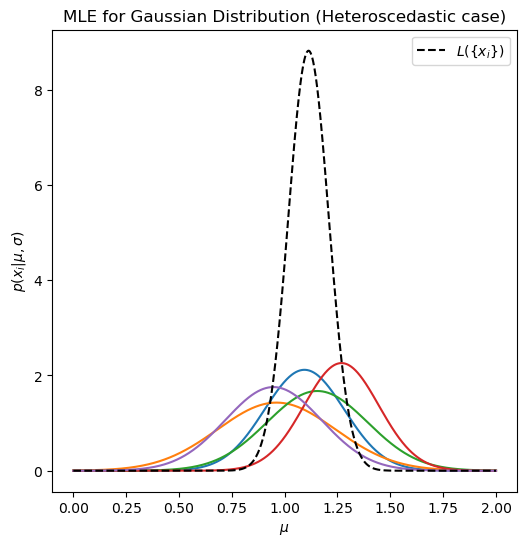

In [35]:
fig, ax = plt.subplots(figsize=(6, 6))

for likelihood in Ls_hetero:
    plt.plot(x_i, likelihood, ls='-')
    
plt.plot(x_i, L_hetero, linestyle='--', c='black', label=r'$L(\{x_i\})$')

plt.xlabel('$\mu$')
plt.ylabel(r'$p(x_i|\mu,\sigma)$')
plt.title('MLE for Gaussian Distribution (Heteroscedastic case)')
plt.legend()

In [36]:
max_index_hetero = np.argmax(L_hetero)
display(Latex(r'L is maximized for $\mu = ' + f'{np.round(x_i[max_index_hetero], 6)}$'))

<IPython.core.display.Latex object>

In [37]:
ML_estimator_hetero = np.average(my_sample_hetero, weights=1/sigma_hetero**2)
display(Latex(r'MLE $ = ' + f'{np.round(ML_estimator_hetero, 6)}$'))

<IPython.core.display.Latex object>

### Compute lnL

In [38]:
logL_hetero = np.log(L_hetero)

In [39]:
diff_hetero = np.diff(logL_hetero, n=2)
sec_der_hetero = diff_hetero / (x_i[1] - x_i[0])**2
sec_der_hetero *= (-1)
sigma_mu_hetero = 1 / np.sqrt(sec_der_hetero[max_index_hetero])

display(Latex(r'Fisher Matrix error on estimated $\hat \mu = ' + f'{np.round(sigma_mu_hetero, 10)}$'))

<IPython.core.display.Latex object>

In [40]:
MLE_sigma_hetero = np.sum(sigma_hetero**(-2))**(-0.5)
display(Latex(r'Fisher Matrix error on estimated $\hat \mu = ' + f'{np.round(MLE_sigma_hetero, 10)}$'))

<IPython.core.display.Latex object>

In [41]:
sigma_mu_hetero-MLE_sigma_hetero

6.473988012345444e-14

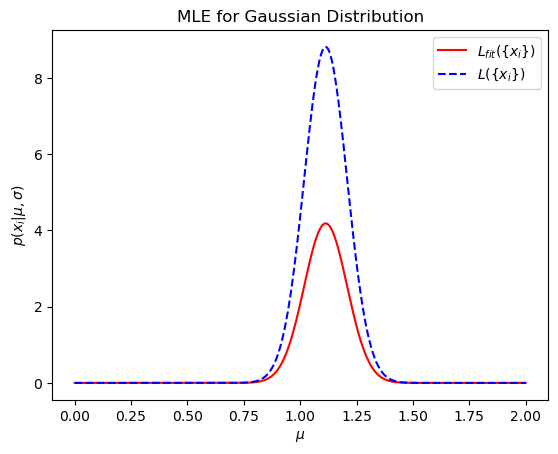

In [43]:
L_fit_hetero = norm.pdf(x_i, loc=ML_estimator_hetero, scale=MLE_sigma_hetero)

plt.plot(x_i, L_fit_hetero, color='red', label=r'$L_{fit}(\{x_i \})$')
plt.plot(x_i, L_hetero, color='blue', linestyle='--', label=r'$L(\{x_i \})$')
plt.xlabel('$\mu$') #Leave out or adjust if no latex
plt.ylabel(r'$p(x_i|\mu,\sigma)$') #Leave out or adjust if no latex
plt.title('MLE for Gaussian Distribution')
plt.legend()